In [1]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io

DATAPOOL_FILE_LOCATION = './data/train.csv'


%matplotlib inline
sns.set()
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Built in colab with local data upload

# uploaded = pd.read_csv('data/train.csv')

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))


In [3]:
# Explore data

df = pd.read_csv('data/train.csv')
df = df[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard',
         'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent', 'chocolate']]

df.head()


,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [4]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)


In [5]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

# Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()


In [6]:
# Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
                    'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]

y_train = train_df["chocolate"]

X_test = test_df[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
                  'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]

y_test = test_df["chocolate"]


In [7]:
train_df

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
74,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,1
24,0,0,0,0,0,0,1,0,0.430,0.918,56.490501,1
59,0,0,0,0,0,0,0,1,0.220,0.081,34.722000,1
35,0,1,0,0,0,0,0,1,0.302,0.511,55.064072,1
42,0,0,1,0,0,0,1,0,0.604,0.767,70.735641,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
23,0,0,0,0,1,0,1,0,0.430,0.918,62.284481,1
21,1,0,0,0,0,0,0,1,0.465,0.465,42.178772,0
47,0,0,1,0,0,0,0,1,0.593,0.651,69.483788,1


In [8]:
# sns.countplot("chocolate", data=train_df, palette='Blues_d')
# plt.show()
# plt.savefig('count_plot')


In [9]:
count_no_choc = len(train_df[train_df['chocolate'] == 0])
count_choc = len(train_df[train_df['chocolate'] == 1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of no chocolate is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of chocolate", pct_of_choc*100)


percentage of no chocolate is 54.41176470588235
percentage of chocolate 45.588235294117645


In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [12]:
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8235294117647058
Precision: 0.6666666666666666
Recall: 1.0


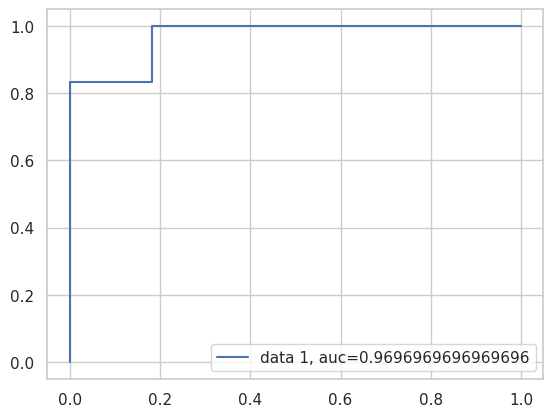

In [13]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
